# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>

<li>Which lego sets were the all-time best sellers? Which sets totally bombed?
    
</ul>
**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="assets/bricks.jpg">


# Import Statements

In [2]:
import pandas as pd 


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [52]:
# How many colors does lego produce
# Load csv file
df = pd.read_csv('data/colors.csv')
# Get total of unique colors
num_unique_colors = df['name'].unique().shape[0]
print(f'Lego produces {num_unique_colors} unique colors')
    





Lego produces 135 unique colors


### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src=https://i.imgur.com/whB1olq.png>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [75]:
sets = pd.read_csv('data/sets.csv')

In [76]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [77]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


### 1949: The Year Legos Were First Introduced

In [78]:
# Find the sets from the earliest year
first_year_sets = sets[sets_df['year']==sets['year'].min()]

In [79]:
first_year_sets

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


We can see that in their first year, lego only sold five unique sets!  Three of these sets were gift sets and the other two were simple component based sets.

### What are the Largest Sets Lego Ever Created?

In [83]:
# Find the rows with the largest number of pieces
largest_sets = sets.sort_values(by='num_parts', ascending=False)

In [85]:
largest_sets.head()


,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


We can see that `The Ultimate Battle for Chima` set contains a whopping 9,987 pieces. 

### Lego Sets Released Year-on-Year


In [116]:
year_over_year = sets.groupby(by='year').value_counts()

In [117]:
year_over_year.head()

year  set_num  name                               theme_id  num_parts
1949  700.1-1  Extra-Large Gift Set (ABB)         365       142          1
      700.2-1  Large Gift Set (ABB)               365       178          1
      700.3-1  Medium Gift Set (ABB)              365       142          1
      700.A-1  Small Brick Set (ABB)              371       24           1
      700.B-1  Small Doors and Windows Set (ABB)  371       12           1
dtype: int64

In [118]:
year_over_year.tail()

year  set_num  name                      theme_id  num_parts
2020  11008-1  Bricks and Houses         621       270          1
      11009-1  Bricks and Lights         621       441          1
2021  75546-1  Minions in Gru’s Lab      689       0            1
      75547-1  Minion Pilot in Training  689       0            1
      75550-1  Minions Kung Fu Battle    689       0            1
dtype: int64

### Is Lego Pumping Out More Or Less Sets Year over Year? 

We can plot and visualize the number of sets released over time.

In [172]:
year_over_year_df = pd.DataFrame(year_over_year)


In [173]:
year_over_year_df.reset_index(inplace=True)

In [268]:
# Create a df based on number of sets per year
sets_per_year = pd.DataFrame(year_over_year_df['year'].value_counts())

In [274]:
sets_per_year.reset_index(inplace=True)

In [277]:
sets_per_year.columns = ['year', 'sets_released']

In [283]:
sets_per_year=sets_per_year.sort_values(by='year')

In [245]:
# Plotting our time series 
import matplotlib.pyplot as plt 


In [289]:
sets_per_year.index = sets_per_year['year']

Text(0.5, 0, 'year')

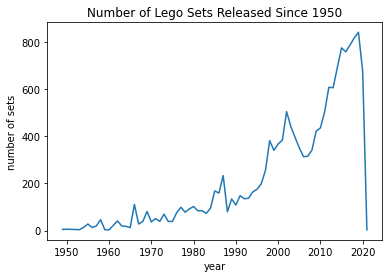

In [305]:
fig, ax = plt.subplots()
ax.plot(sets_per_year)
ax.set_title('Number of Lego Sets Released Since 1950')
ax.set_ylabel('number of sets')
ax.set_xlabel('year')


As we can see form our chart, the number of sets released per year has increased most agressively from 1990 - 2019.

<AxesSubplot:>

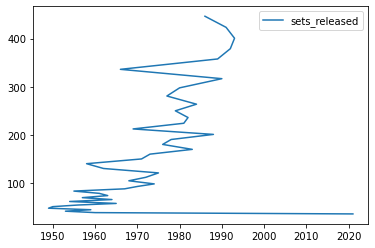

In [240]:
sets_per_year.rolling(30).mean().plot()

In [206]:
sets_per_year

,sets_released,moving_average(30)
2019,840,NaN
2018,816,NaN
2017,786,NaN
2015,774,NaN
2016,757,NaN
...,...,...
1949,5,47.666667
1959,4,44.500000
1953,4,41.466667
1960,3,38.500000


 
 show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

### Merging (i.e., Combining) DataFrames based on a Key
